In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\moham\Downloads\archive\results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
print(f"This Dataset Includes {df.shape}")

This Dataset Includes (44762, 9)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44762 entries, 0 to 44761
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44762 non-null  object
 1   home_team   44762 non-null  object
 2   away_team   44762 non-null  object
 3   home_score  44762 non-null  int64 
 4   away_score  44762 non-null  int64 
 5   tournament  44762 non-null  object
 6   city        44762 non-null  object
 7   country     44762 non-null  object
 8   neutral     44762 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [7]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [8]:
df.describe()

,home_score,away_score
count,44762.000000,44762.000000
mean,1.739176,1.178343
std,1.746801,1.393183
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
df.describe(include=object)

,date,home_team,away_team,tournament,city,country
count,44762,44762,44762,44762,44762,44762
unique,15610,311,306,145,2030,268
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,597,562,17653,677,1325


In [10]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:

df['date'] = pd.to_datetime(df['date'])

In [12]:
#Tournament Analysis

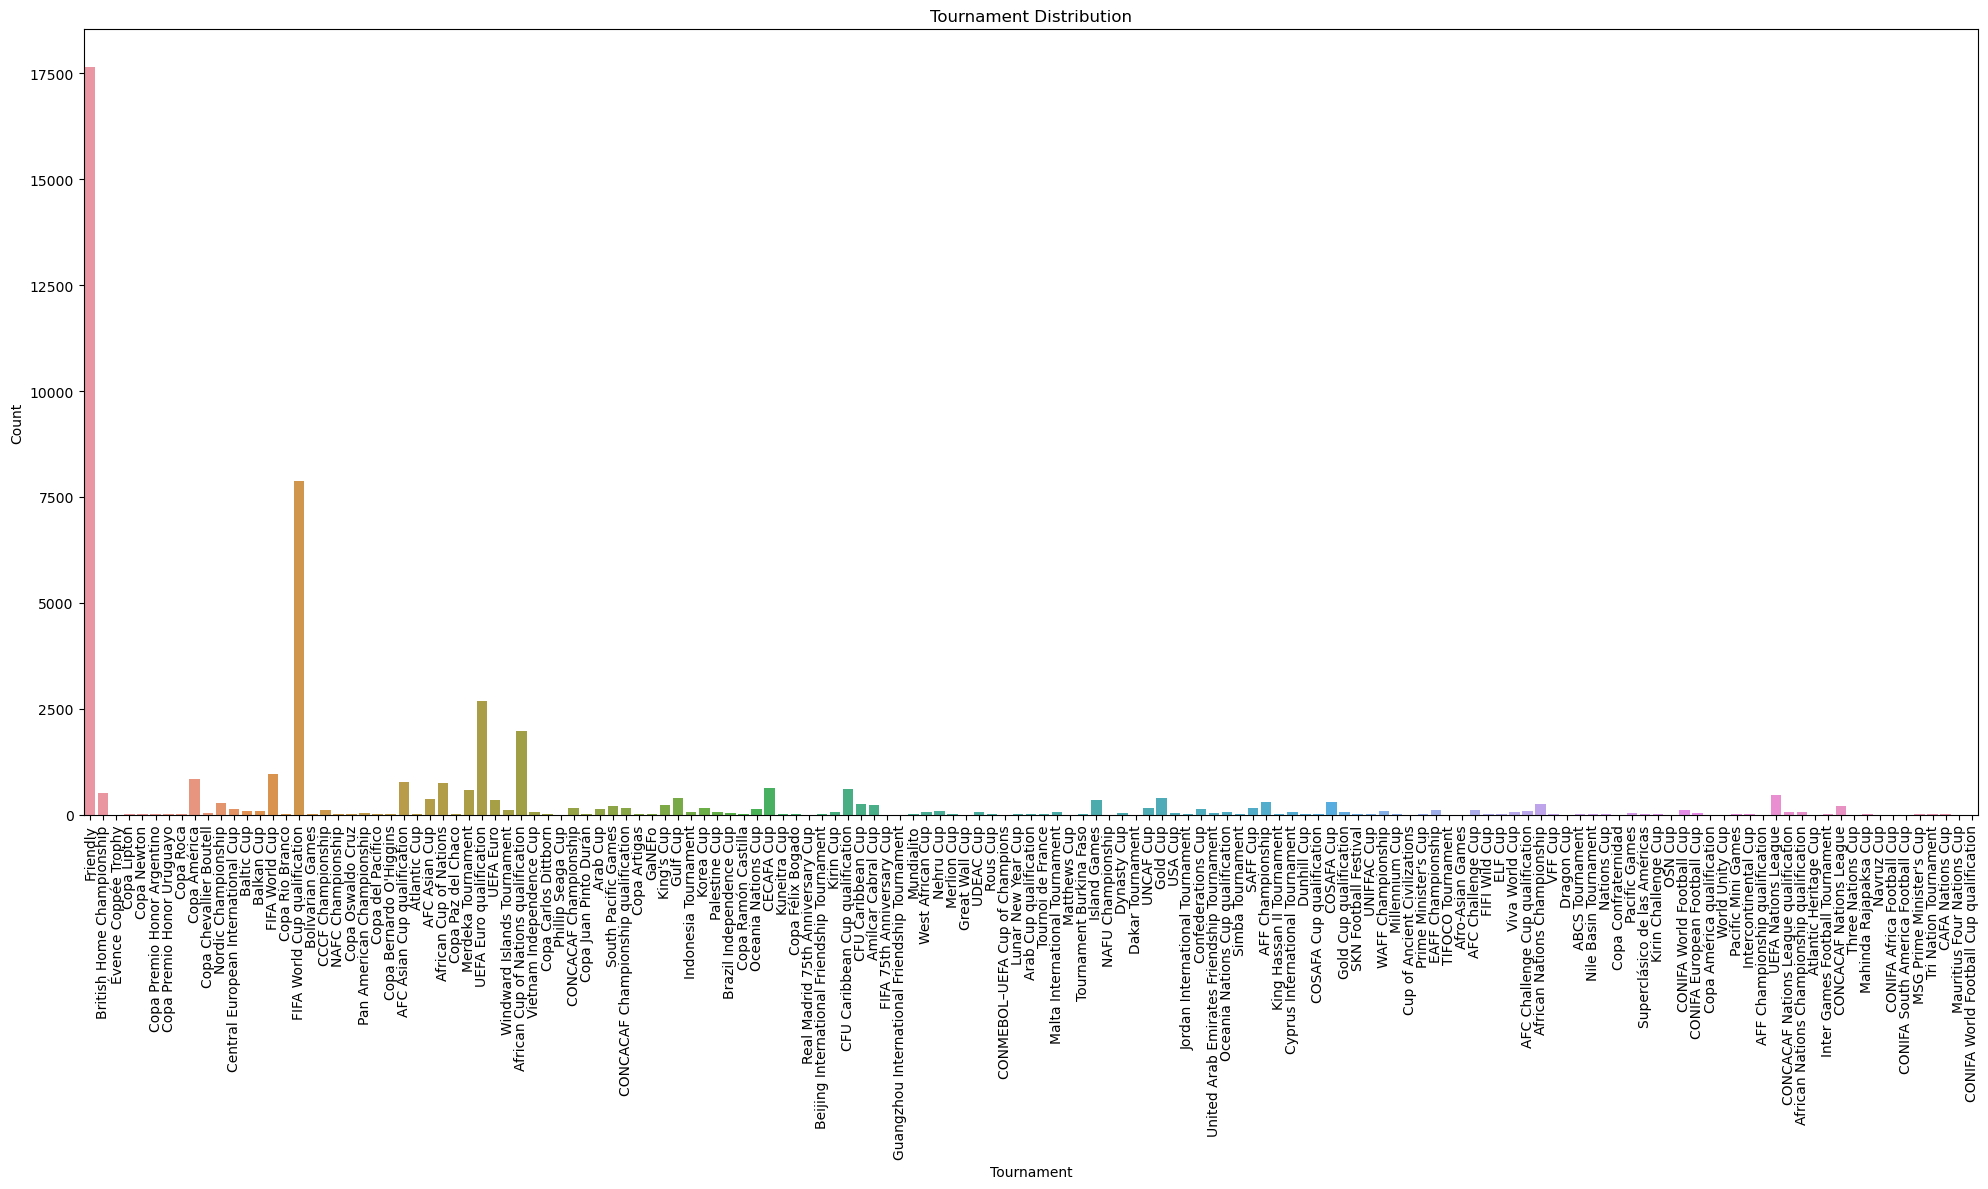

In [13]:
plt.figure(figsize=(20, 12))
sns.countplot(x='tournament', data=df)
plt.xticks(rotation=90)
plt.title('Tournament Distribution')
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
#Home and Away Scores

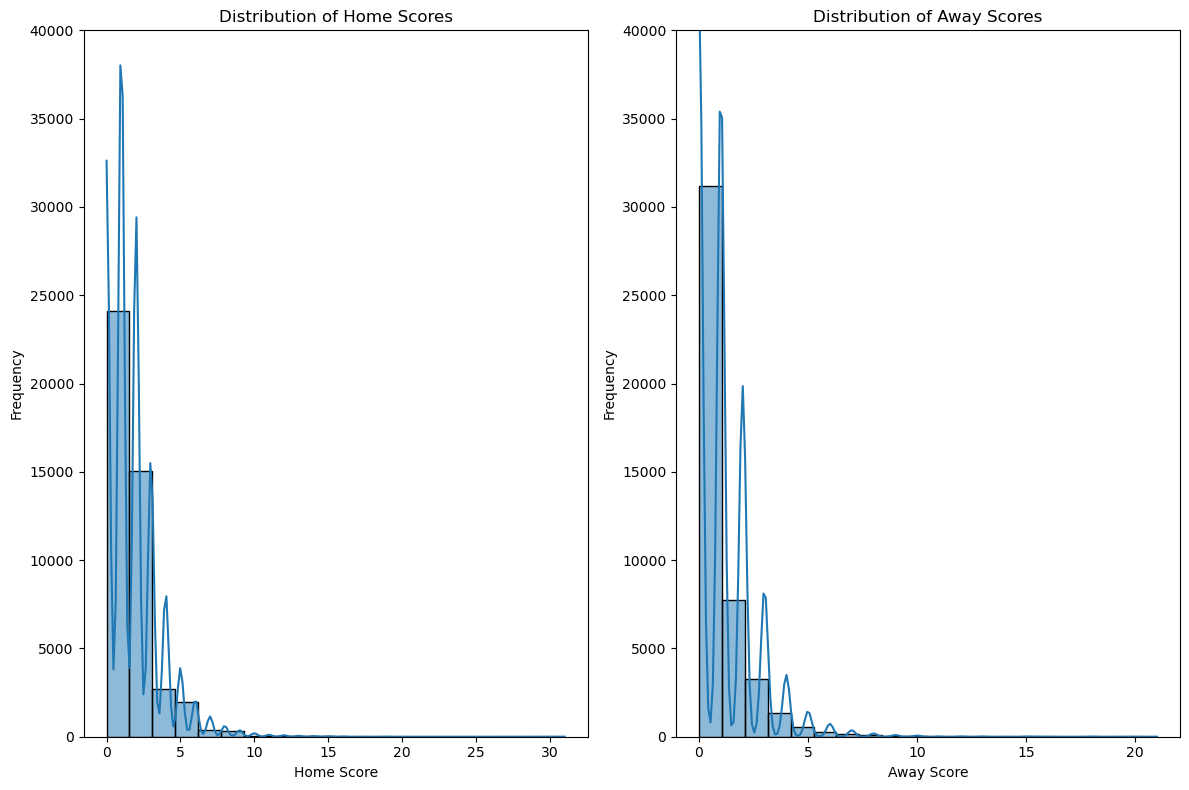

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['home_score'], bins=20, kde=True)
plt.title('Distribution of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Frequency')
#Setting limit for first plot
plt.ylim(0, 40000)


plt.subplot(1, 2, 2)
sns.histplot(df['away_score'], bins=20, kde=True)
plt.title('Distribution of Away Scores')
plt.xlabel('Away Score')
plt.ylabel('Frequency')
# Share y-axis between subplots
plt.ylim(0, 40000)

plt.tight_layout()
plt.show()

In [16]:
#Correlation Analysis

C:\Users\moham\AppData\Local\Temp\ipykernel_17148\2935713837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


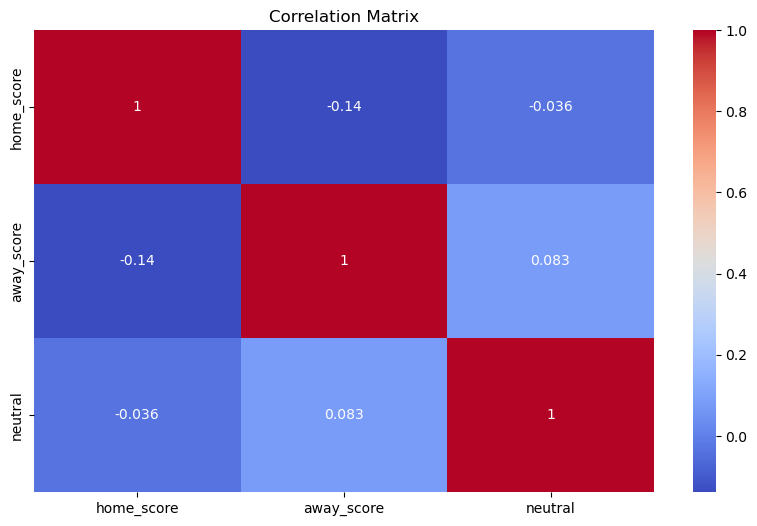

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
#Time Series Analysis

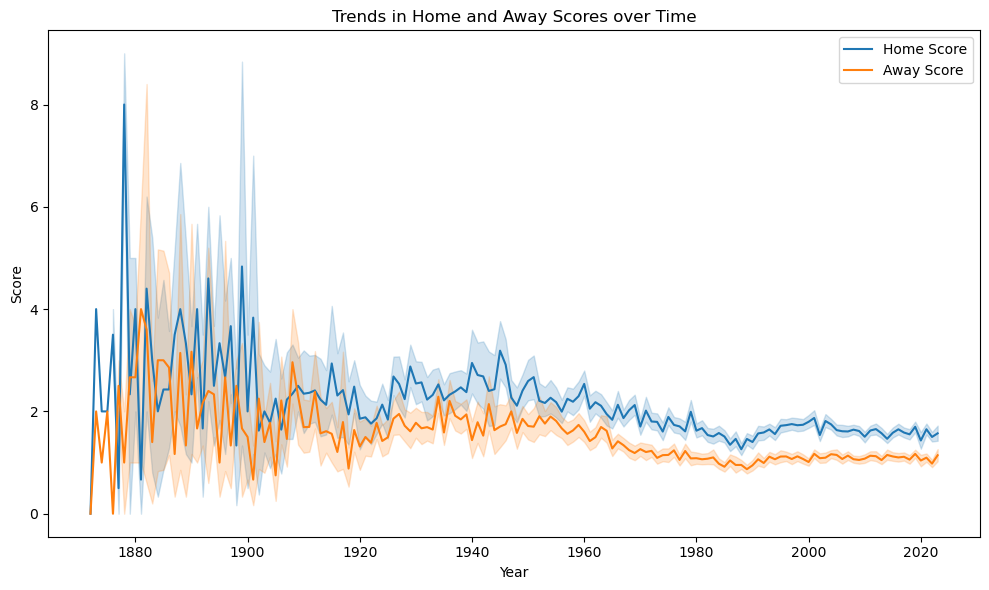

In [19]:
df['year'] = df['date'].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='home_score', data=df, label='Home Score')
sns.lineplot(x='year', y='away_score', data=df, label='Away Score')
plt.title('Trends in Home and Away Scores over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()